In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataset = pd.read_csv('heart.csv')
dataset.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [39]:
dataset['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [40]:
dataset['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [41]:
dataset['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [42]:
dataset['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [43]:
dataset['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [44]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

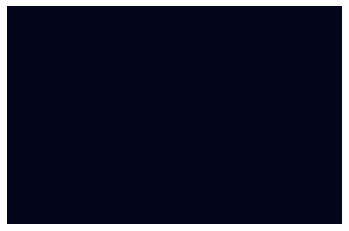

In [45]:
sns.heatmap(dataset.isna(),yticklabels=False,xticklabels=False,cbar=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


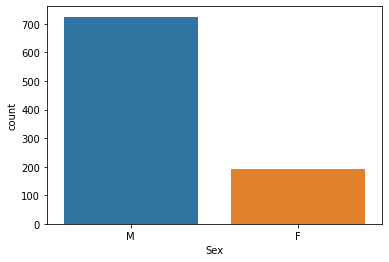

In [46]:
sns.countplot(dataset['Sex'])

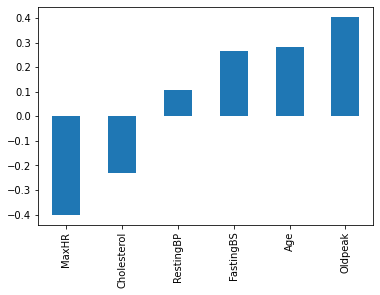

In [47]:
dataset.corr()['HeartDisease'].sort_values()[:-1].plot(kind='bar')

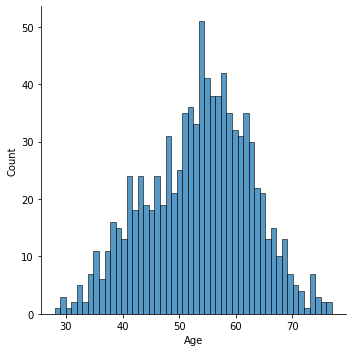

In [48]:
sns.displot(x='Age',data=dataset,bins=50)

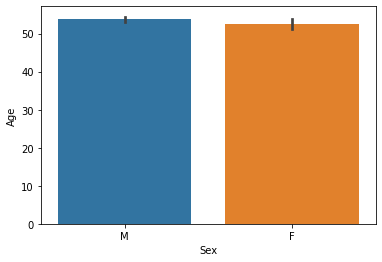

In [49]:
sns.barplot(x='Sex',y='Age',data=dataset)

In [50]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

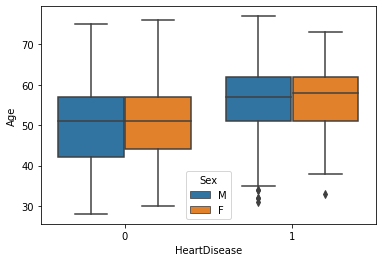

In [51]:
sns.boxplot(x='HeartDisease',y='Age',data=dataset,hue='Sex')

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [54]:
X = dataset.drop('HeartDisease',axis=1)
X = X.iloc[:,:].values
X

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [55]:
ct = ColumnTransformer([('OneHotEncoder',OneHotEncoder(),[1,2,6,8,10])],remainder='passthrough')

In [56]:
X = ct.fit_transform(X)

In [57]:
X.shape
type(X)

numpy.ndarray

In [58]:
y = dataset['HeartDisease'].values
y.shape 

(918,)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(642, 20)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model = Sequential()

In [64]:
model.add(Dense(20,activation ='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [65]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [66]:
# y_train = y_train.reshape(642,-1)
# y_test = y_test.reshape(276,-1)
# y_train.shape

In [67]:
model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
21/21 [==============================] - 1s 11ms/step - loss: 0.6697 - val_loss: 0.6450
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6086 - val_loss: 0.5893
Epoch 3/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5432 - val_loss: 0.5240
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4732 - val_loss: 0.4622
Epoch 5/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4081 - val_loss: 0.4117
Epoch 6/500
21/21 [==============================] - 0s 4ms/step - loss: 0.3583 - val_loss: 0.3835
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3293 - val_loss: 0.3740
Epoch 8/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3134 - val_loss: 0.3705
Epoch 9/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3036 - val_loss: 0.3710
Epoch 10/500
21/21 [==============================] - 0s 3ms/step - loss: 0.2941 - val_loss: 0.3694
Epoch 11

In [69]:
loss = model.history.history

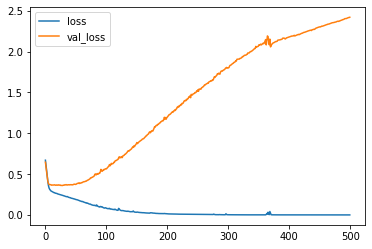

In [70]:
loss_pd = pd.DataFrame(data=loss)
loss_pd.plot()

In [76]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import  EarlyStopping

In [77]:
model = Sequential()
model.add(Dense(20,activation ='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(20,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid'))

In [78]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [79]:
earlystop = EarlyStopping(monitor='val_loss',patience=25,verbose=1,mode='min')

In [80]:
model.fit(X_train,y_train,epochs=250,verbose=1,callbacks=[earlystop],validation_data=(X_test,y_test))

Epoch 1/250
21/21 [==============================] - 1s 10ms/step - loss: 0.8525 - val_loss: 0.6795
Epoch 2/250
21/21 [==============================] - 0s 4ms/step - loss: 0.8403 - val_loss: 0.6595
Epoch 3/250
21/21 [==============================] - 0s 4ms/step - loss: 0.7771 - val_loss: 0.6479
Epoch 4/250
21/21 [==============================] - 0s 3ms/step - loss: 0.7130 - val_loss: 0.6403
Epoch 5/250
21/21 [==============================] - 0s 4ms/step - loss: 0.7149 - val_loss: 0.6343
Epoch 6/250
21/21 [==============================] - 0s 4ms/step - loss: 0.7021 - val_loss: 0.6309
Epoch 7/250
21/21 [==============================] - 0s 4ms/step - loss: 0.7017 - val_loss: 0.6289
Epoch 8/250
21/21 [==============================] - 0s 4ms/step - loss: 0.6739 - val_loss: 0.6242
Epoch 9/250
21/21 [==============================] - 0s 4ms/step - loss: 0.6613 - val_loss: 0.6170
Epoch 10/250
21/21 [==============================] - 0s 4ms/step - loss: 0.6507 - val_loss: 0.6083
Epoch 11

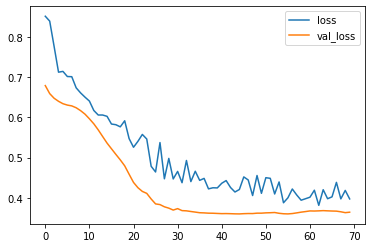

In [82]:
loss = model.history.history
loss_pd = pd.DataFrame(loss)
loss_pd.plot()

In [83]:
predictions = model.predict(X_test)

In [86]:
predictions = np.round(predictions).astype(int)
predictions

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [92]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       126
           1       0.82      0.88      0.85       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



In [94]:
print(confusion_matrix(y_test,predictions))

[[ 98  28]
 [ 18 132]]


In [95]:
print(roc_auc_score(y_test,predictions))

0.8288888888888888
